In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('IRIS.csv')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from typing import List, Tuple

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

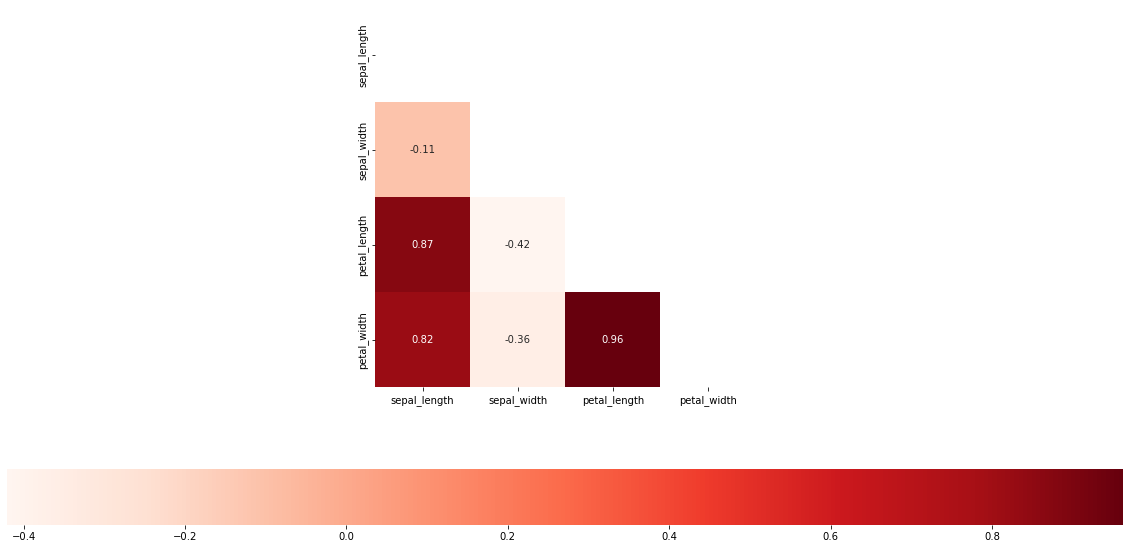

In [2]:
plt.figure(figsize=(20, 10))
correlation = df.corr()
matrix = np.triu(correlation)

sns.heatmap(correlation, cmap='Reds', square=True, cbar=True, cbar_kws={ 'orientation': 'horizontal' }, annot=True, fmt='.2f', mask=matrix)

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

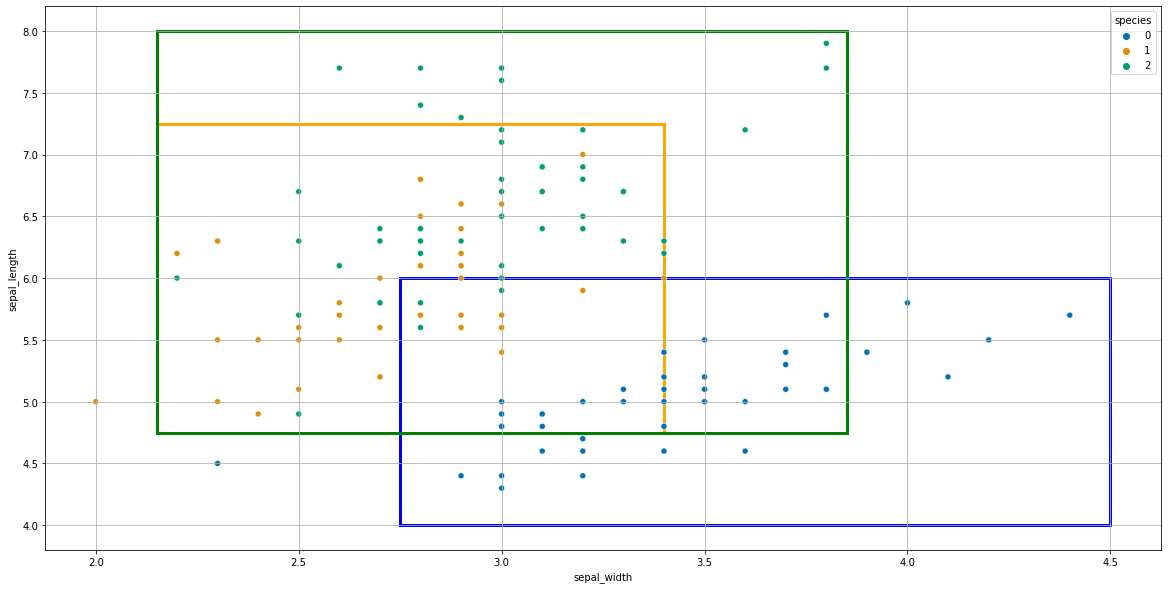

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()

rect = ax.add_patch(patches.Rectangle((2.75, 4), 1.75, 2, linewidth=3, edgecolor='blue', facecolor='none'))
rect = ax.add_patch(patches.Rectangle((2.15, 4.75), 1.25, 2.5, linewidth=3, edgecolor='orange', facecolor='none'))
rect = ax.add_patch(patches.Rectangle((2.15, 4.75), 1.7, 3.25, linewidth=3, edgecolor='green', facecolor='none'))

sns.scatterplot(
  data=df,
  x='sepal_width',
  y='sepal_length',
  hue='species',
  palette=sns.color_palette('colorblind', len(df.species.unique())),
  markers='species',
  ax=ax,
)


<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

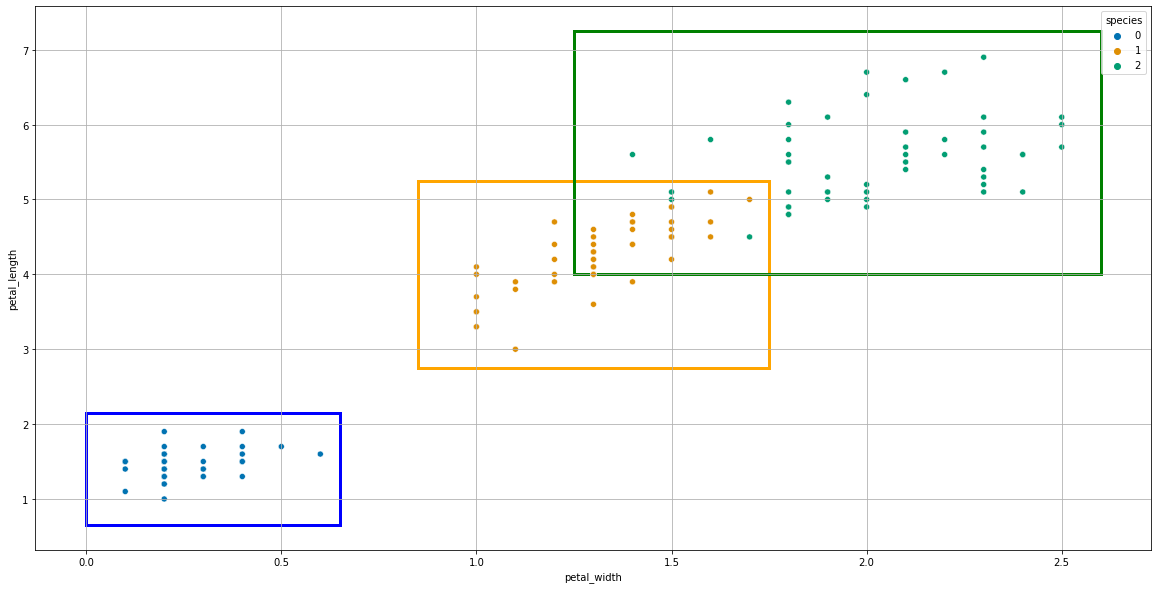

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()

rect = ax.add_patch(patches.Rectangle((0, .65), 0.65, 1.5, linewidth=3, edgecolor='blue', facecolor='none'))
rect = ax.add_patch(patches.Rectangle((.85, 2.75), .9, 2.5, linewidth=3, edgecolor='orange', facecolor='none'))
rect = ax.add_patch(patches.Rectangle((1.25, 4), 1.35, 3.25, linewidth=3, edgecolor='green', facecolor='none'))

sns.scatterplot(
  data=df,
  x='petal_width',
  y='petal_length',
  hue='species',
  palette=sns.color_palette('colorblind', len(df.species.unique())),
  markers='species',
  ax=ax,
)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
df['species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2], inplace=True)
X_tmp = np.asanyarray(df[['sepal_length','sepal_width','petal_length','petal_width']])

y_tmp = np.asanyarray(df[['species']])
X_train, X_test, y_train, y_test = train_test_split(X_tmp, y_tmp, test_size=.33, random_state=1, stratify=y_tmp, shuffle=True)

In [8]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=1).fit(X_train, y_train)

E:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
clf_log.score(X_train, y_train)


0.97

In [9]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

In [28]:
def compute_gradient_linear_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw     

In [81]:
np.random.seed(1)
df['species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2], inplace=True)
X_tmp = np.asanyarray(df[['sepal_length','sepal_width','petal_length','petal_width']])

y_tmp = np.asanyarray(df[['species']])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp =0.5


lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: [1.93679858]
Regularized dj_dw:
 [11.076015431125551]


In [12]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                            #(n,)
    dj_db = 0.0                                       #scalar

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw  

In [21]:
np.random.seed(12)
X_tmp = np.asanyarray(df[['sepal_length','sepal_width','petal_length','petal_width']])
y_tmp = np.asanyarray(df[['species']])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp =0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f" dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: [-0.0072287]
 dj_dw:
 [-0.5646873060712079, 0.12918921944556325, -1.3795197954077003, -0.5962639834680712]


In [25]:
np.random.seed(12)
X_tmp = np.asanyarray(df[['sepal_length','sepal_width']])
y_tmp = np.asanyarray(df[['species']])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp =0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )


dj_db: [-0.02634707]
Regularized dj_dw:
 [-0.678540106575134, 0.07430163523277591]
